In [ ]:
import pandas as pd
df = pd.read_csv('/content/electricity_consumption_optimization_dataset.csv')
df.head()

,Timestamp,Building Type,Energy Consumption (kWh),Temperature (°C),Humidity (%),Occupancy Rate (%),Lighting Consumption (kWh),HVAC Consumption (kWh),Energy Price ($/kWh),Carbon Emission Rate (g CO2/kWh),...,Energy Savings Target (%),Room-Level Energy Consumption (kWh),Zonal Heating/Cooling Data (kWh),Electric Vehicle Charging Status,Building Orientation,IoT Sensor Count,Thermal Comfort Index,Energy Savings Potential (%),Peak Demand Reduction Indicator,Carbon Emission Reduction Category
0,2018-01-01 00:00:00,Residential,74.679912,31.357437,62.472886,49.293544,9.892054,9.073339,0.053297,341.764320,...,16.208574,13.341547,6.719547,0,South,21.425365,80.807871,14.115263,0,Moderate Reduction
1,2018-01-01 01:00:00,Industrial,46.592761,30.229121,63.067770,65.039117,11.063696,26.487881,0.019031,427.270057,...,16.081108,11.750894,7.041203,1,South,34.385339,79.679998,4.107683,0,Moderate Reduction
2,2018-01-01 02:00:00,Commercial,58.836657,19.182581,65.030972,-16.599946,0.582297,10.385565,0.060282,278.064969,...,17.463861,24.297381,12.874189,0,North,67.588352,84.571954,4.130955,0,Moderate Reduction
3,2018-01-01 03:00:00,Residential,53.586516,16.700048,67.405643,27.398152,3.580005,8.199913,0.209318,691.906306,...,14.132527,24.586379,9.526672,0,South,37.714465,95.953736,8.681566,0,No Reduction
4,2018-01-01 04:00:00,Residential,37.800448,29.620051,55.069770,74.220380,17.823608,12.268133,0.225335,620.526286,...,20.960512,24.482306,10.039815,0,North,36.321629,68.227000,19.631869,0,Moderate Reduction


In [ ]:
import pandas as pd
df = pd.read_csv('/content/electricity_consumption_optimization_dataset.csv')

df.drop(columns=['Building Type',
    'Zonal Heating/Cooling Data (kWh)', 'Electric Vehicle Charging Status',
    'Building Orientation', 'Thermal Comfort Index' ,'Reactive Power (kVARh)' , 'Building Size (m²)', 'Window-to-Wall Ratio (%)', 'Insulation Quality Score',
       'Historical Energy Consumption (kWh)', 'Maintenance Status',
       'Demand Response Participation', 'Occupancy Schedule',
       'Local Energy Production (kWh)', 'Grid Stability Score',
       'Solar Irradiance (W/m²)', 'Smart Plug Usage (kWh)',
       'Water Usage (liters)', 'Energy Savings Target (%)',
       'Room-Level Energy Consumption (kWh)', 'Power Outage Indicator',
       'Indoor Temperature (°C)', 'Building Age (years)', 'Peak Demand Reduction Indicator',
       'Equipment Age (years)' , 'Power Factor' , 'Carbon Emission Reduction Category' , 'Voltage Levels (V)' , 'Energy Efficiency Rating',
], inplace=True)
print("After:", df.columns)

After: Index(['Timestamp', 'Energy Consumption (kWh)', 'Temperature (°C)',
       'Humidity (%)', 'Occupancy Rate (%)', 'Lighting Consumption (kWh)',
       'HVAC Consumption (kWh)', 'Energy Price ($/kWh)',
       'Carbon Emission Rate (g CO2/kWh)', 'IoT Sensor Count',
       'Energy Savings Potential (%)'],
      dtype='object')


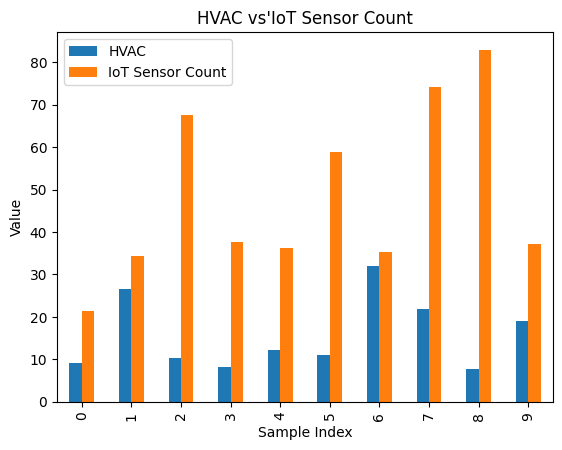

In [ ]:
import matplotlib.pyplot as plt

df_subset = df[['HVAC Consumption (kWh)', 'IoT Sensor Count']].head(10)
df_subset.plot(kind='bar')
plt.title("HVAC vs'IoT Sensor Count")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend(["HVAC", "IoT Sensor Count"])
plt.show()

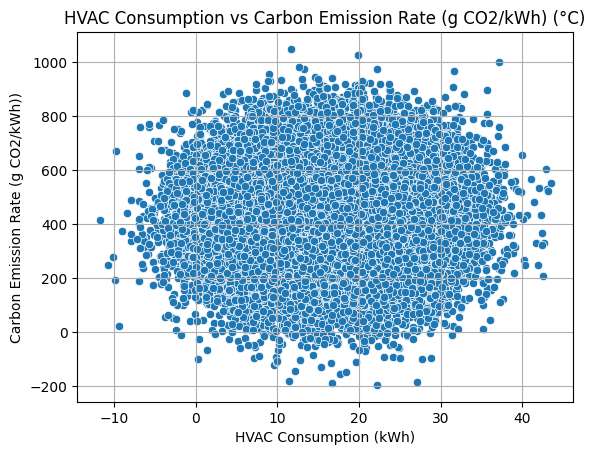

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='HVAC Consumption (kWh)', y='Carbon Emission Rate (g CO2/kWh)')
plt.title("HVAC Consumption vs Carbon Emission Rate (g CO2/kWh) (°C)")
plt.xlabel("HVAC Consumption (kWh)")
plt.ylabel("Carbon Emission Rate (g CO2/kWh))")
plt.grid(True)
plt.show()


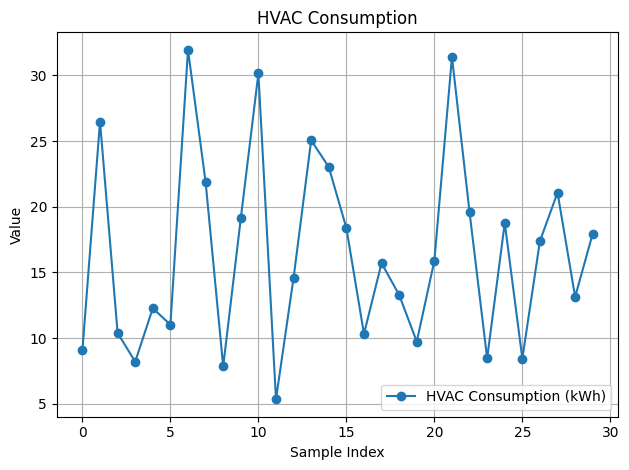

In [ ]:
import matplotlib.pyplot as plt
df_subset = df[['HVAC Consumption (kWh)']].head(30)
df_subset.plot(kind='line', marker='o')
plt.title("HVAC Consumption")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend(["HVAC Consumption (kWh)", ])
plt.grid(True)
plt.tight_layout()
plt.show()


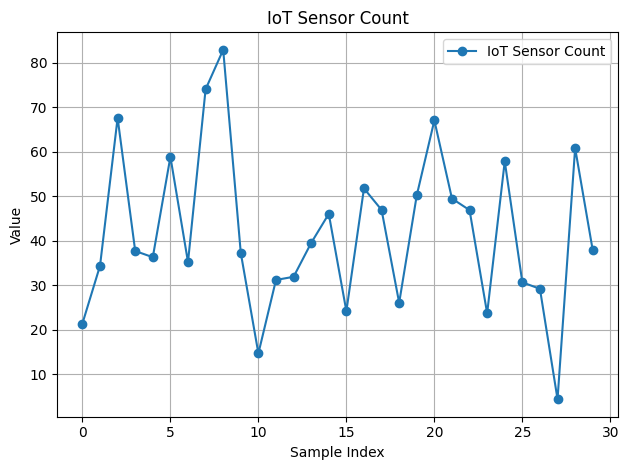

In [ ]:
import matplotlib.pyplot as plt
df_subset = df[['IoT Sensor Count']].head(30)

# Plot as a line chart
df_subset.plot(kind='line', marker='o')
plt.title("IoT Sensor Count")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend(["IoT Sensor Count", ])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
df = pd.read_csv("/content/electricity_consumption_optimization_dataset.csv")

# Select features
input_features = ['Temperature (°C)', 'Humidity (%)', 'Occupancy Rate (%)']
target_outputs = [
    'Lighting Consumption (kWh)',
    'HVAC Consumption (kWh)',
    'Energy Price ($/kWh)',
    'Carbon Emission Rate (g CO2/kWh)'
]

X = df[input_features]
y = df[target_outputs]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y.shape[1])
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# ----------- Optimization Phase ------------

input_var = tf.Variable([[0.5, 0.5, 0.5]], dtype=tf.float32)


def energy_cost_function(input_var):
    pred = model(input_var)
    weights = tf.constant([0.25, 0.35, 0.20, 0.20])
    return tf.reduce_sum(pred * weights)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

for step in range(500):
    with tf.GradientTape() as tape:
        cost = energy_cost_function(input_var)
    grads = tape.gradient(cost, [input_var])
    optimizer.apply_gradients(zip(grads, [input_var]))
    input_var.assign(tf.clip_by_value(input_var, 0.0, 1.0))

# Output optimized values
optimized_inputs = scaler_X.inverse_transform(input_var.numpy())
optimized_outputs = scaler_y.inverse_transform(model(input_var).numpy())

print("🔧 Optimized Input Conditions:")
for name, val in zip(input_features, optimized_inputs[0]):
    print(f"{name}: {val:.2f}")

print("\n⚡ Predicted Energy Metrics under Optimized Conditions:")
for name, val in zip(target_outputs, optimized_outputs[0]):
    print(f"{name}: {val:.2f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1184/1184 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0284 - val_loss: 0.0152
Epoch 2/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0154 - val_loss: 0.0150
Epoch 3/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0153 - val_loss: 0.0153
Epoch 4/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 5/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0154 - val_loss: 0.0150
Epoch 6/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 7/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 8/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 9/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 10/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 11/100
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 12/100
1184/1184 ━━━━━━━━

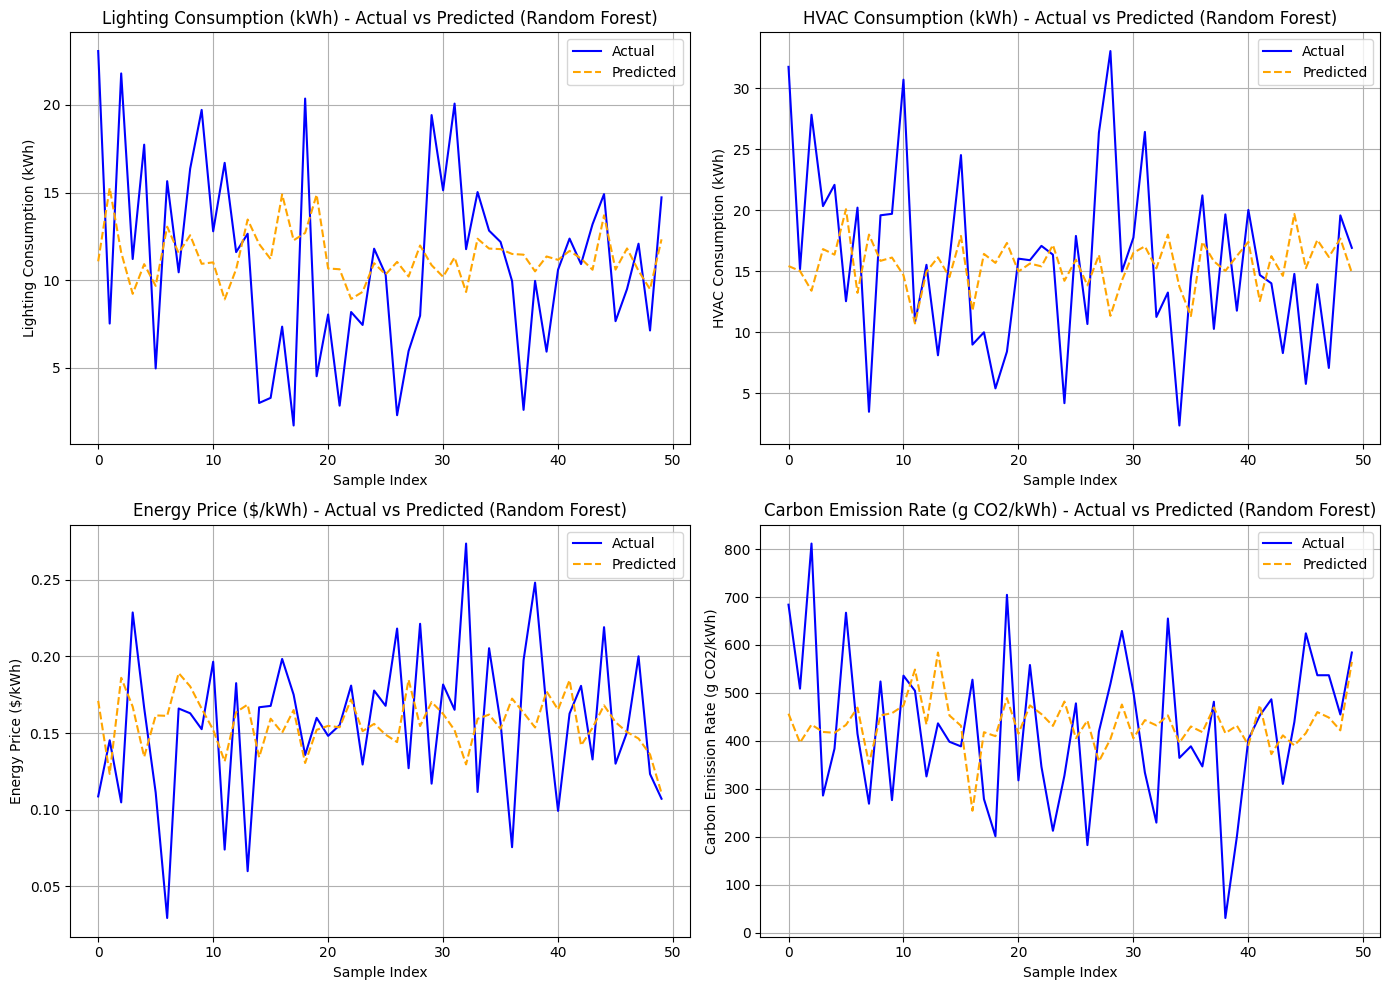

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a Random Forest Regressor for multi-output prediction
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf_scaled = rf_model.predict(X_test)

# Inverse scale predictions and actual values
y_pred_rf = scaler_y.inverse_transform(y_pred_rf_scaled)
y_actual = scaler_y.inverse_transform(y_test)

# Plot actual vs. predicted for each target output
plt.figure(figsize=(14, 10))

for i, target in enumerate(target_outputs):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_actual[:50, i], label='Actual', color='blue', linestyle='-')
    plt.plot(y_pred_rf[:50, i], label='Predicted', color='orange', linestyle='--')
    plt.title(f"{target} - Actual vs Predicted (Random Forest)")
    plt.xlabel("Sample Index")
    plt.ylabel(target)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()
